# __PRAKTIKUM III__
## __Penambangan Data dalam Sains__
### __Mohammad Rizka Fadhli - 20921004__

# _Clustering_

Pada praktikum kali ini saya akan melakukan pengelompokkan dataset (_clustering_) menggunakan dua metode, yakni:

1. _Hierarchical clustering_.
1. _K-Means clustering_.

# Catatan

## Alur Kerja

Berikut adalah alur kerja yang saya lakukan:

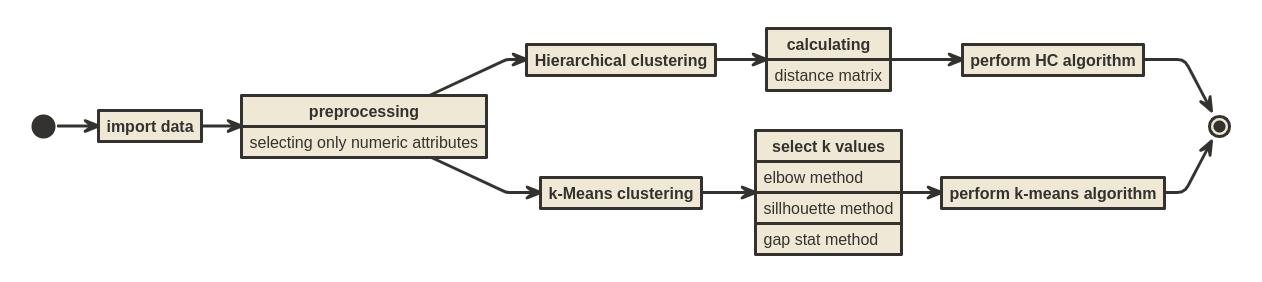

## Data yang Digunakan

Data yang digunakan adalah `predictive_maintenance (1).csv` yang di-_import_ langsung dari _link_ __github__ [berikut ini](https://raw.githubusercontent.com/salmanhiro/Praktikum-Data-Mining/main/Praktikum%203/predictive_maintenance%20(1).csv).

## Bahasa yang Digunakan

Saya membuat _notebook_ praktikum ini di _environment_ __Google Colab__ menggunakan bahasa __R__ yang dapat diakses langsung di [_link_ berikut ini](https://colab.research.google.com/drive/1wKS5H50QSmo23yh_Z4iRM-yI4zL3oTZI?usp=sharing)

## Instalasi _Libraries_ dan _System Files_ yang Dibutuhkan

Pertama-tama saya _install_ terlebih dahulu __R__ _libraries_ yang dibutuhkan dan _file_ yang berguna pada _linux_ untuk melakukan _clustering_.

In [59]:
# instalasi beberapa system R di Google Colab Environment 
#system("sudo apt-get update")
#system("sudo apt-get install r-cran-car")

In [60]:
# instalasi libraries yang dibutuhkan
#install.packages("janitor")
#install.packages("caret")
#install.packages("factoextra")

In [61]:
# membersihkan global environment
rm(list=ls())
# load semua libraries yang dibutuhkan
library(dplyr)
library(cluster)
library(caret)
library(factoextra)
library(ggplot2)

## _Import_ Data

Saya _import_ data langsung dengan mengambil _file_ `.csv` dari _link_ github berikut [ini](https://raw.githubusercontent.com/salmanhiro/Praktikum-Data-Mining/main/Praktikum%203/predictive_maintenance%20(1).csv).

In [62]:
# import data
data = read.csv("https://raw.githubusercontent.com/salmanhiro/Praktikum-Data-Mining/main/Praktikum%203/predictive_maintenance%20(1).csv") %>% janitor::clean_names()
# melihat struktur data
str(data)

'data.frame':	8000 obs. of  11 variables:
 $ x                    : int  3926 5433 9989 341 9495 6842 140 9599 4590 9151 ...
 $ udi                  : int  3927 5434 9990 342 9496 6843 141 9600 4591 9152 ...
 $ product_id           : chr  "L51106" "L52613" "M24849" "M15201" ...
 $ type                 : chr  "L" "L" "M" "M" ...
 $ air_temperature_k    : num  303 303 299 297 299 ...
 $ process_temperature_k: num  312 312 308 308 310 ...
 $ rotational_speed_rpm : int  1609 1550 1577 1530 1373 1635 1511 1463 1456 1553 ...
 $ torque_nm            : num  36 45.5 33.2 32.6 44.8 29.6 36.1 37.4 36.1 40.5 ...
 $ tool_wear_min        : int  162 72 0 22 221 211 157 56 89 135 ...
 $ target               : int  0 0 0 0 0 0 0 0 0 0 ...
 $ failure_type         : chr  "No Failure" "No Failure" "No Failure" "No Failure" ...


Dari struktur data sebelumnya, saya hanya akan memilih atribut yang berupa numerik saja, yakni:

1. `type`,
1. `air_temperature_k`,
1. `process_temperature_k`,
1. `rotational_speed_rpm`,
1. `torque_nm`,
1. `tool_wear_min`.

Mengenai atribut `type`, saya akan lakukan _one hot encoding_ agar menjadi atribut _binary_.

In [63]:
# proses seleksi atribut
data = 
  data %>%
  select(type,
         air_temperature_k,
         process_temperature_k,
         rotational_speed_rpm,
         torque_nm,
         tool_wear_min)

In [64]:
# proses one hot encoding
  # data yang akan dijadikan basis untuk melakukan clustering adatalah data_n2
  data_n1 = dummyVars(" ~ .", data = data)
  data_n2 = data.frame(predict(data_n1, newdata = data))
# melihat sampe 10 data teratas dari data_n2
head(data_n2)
# melihat struktur dari data_n2
str(data_n2)

,typeH,typeL,typeM,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1,0,302.6,311.5,1609,36.0,162
2,0,1,0,302.9,312.5,1550,45.5,72
3,0,0,1,298.8,308.5,1577,33.2,0
4,0,0,1,297.4,308.2,1530,32.6,22
5,1,0,0,299.3,310.0,1373,44.8,221
6,0,1,0,301.2,311.2,1635,29.6,211


'data.frame':	8000 obs. of  8 variables:
 $ typeH                : num  0 0 0 0 1 0 0 0 0 0 ...
 $ typeL                : num  1 1 0 0 0 1 1 1 1 1 ...
 $ typeM                : num  0 0 1 1 0 0 0 0 0 0 ...
 $ air_temperature_k    : num  303 303 299 297 299 ...
 $ process_temperature_k: num  312 312 308 308 310 ...
 $ rotational_speed_rpm : num  1609 1550 1577 1530 1373 ...
 $ torque_nm            : num  36 45.5 33.2 32.6 44.8 29.6 36.1 37.4 36.1 40.5 ...
 $ tool_wear_min        : num  162 72 0 22 221 211 157 56 89 135 ...


# k-Means

Pertama-tama saya akan melakukan _k-means clustering_, langkah awal yang harus dilakukan adalah mencari nilai ___k___ yang tepat.

Saya akan gunakan tiga metode yang bisa digunakan untuk mencarinya, yakni:

1. _Elbow method_,
1. _Sillhouette method_,
1. _Gap Stat method_.

---

## Elbow Method

Berikut adalah hasil perhitungan _elbow method_:

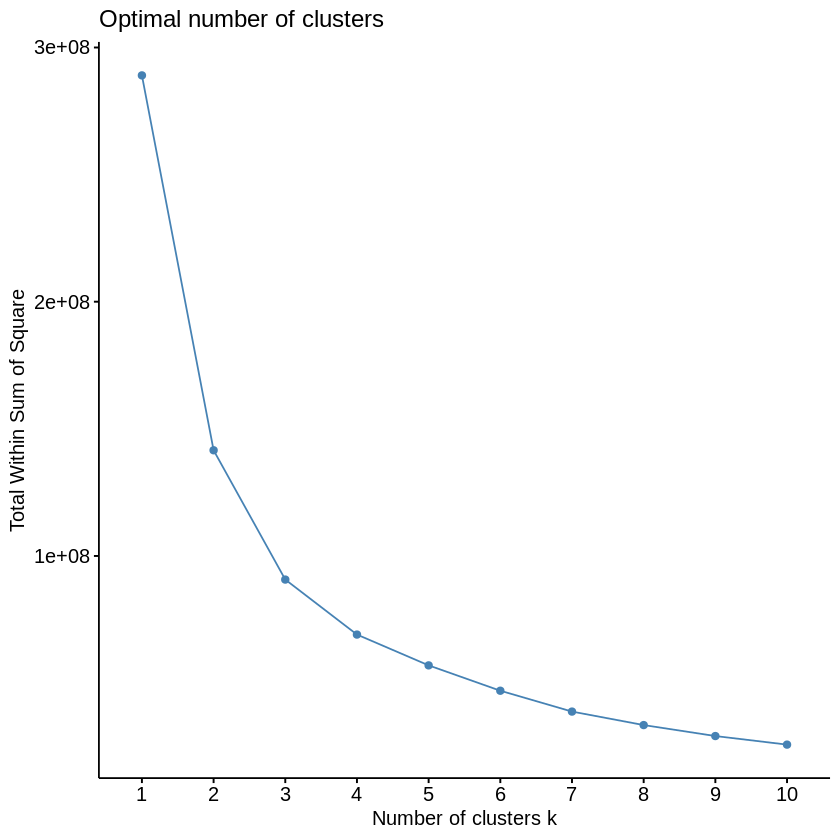

In [65]:
# elbow method dan plotnya
elbow = fviz_nbclust(data_n2, kmeans, method = "wss")
plot(elbow)

Dari plot di atas, kita dapatkan bahwa nilai ___k___ yang optimal ada pada saat $k=3$ (saat ada kenaikan tertinggi pertama kali pada sumbu $y$).

---

## _Sillhouette Method_

Berikut adalah hasil perhitungan _sillhouette method_:

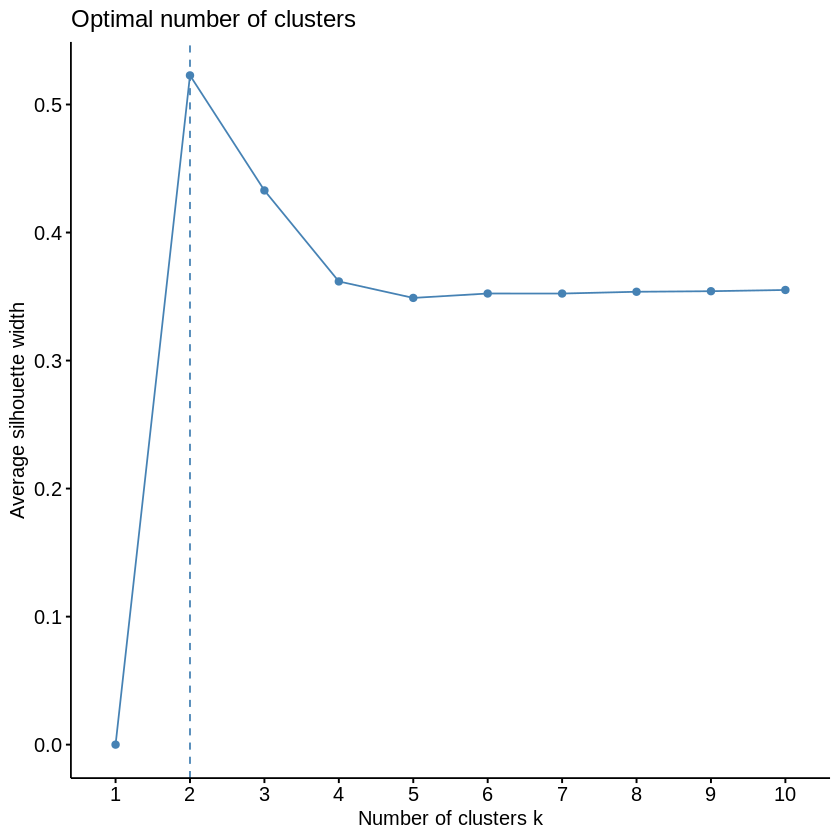

In [66]:
# sillhouette method dan plotnya
siluet = fviz_nbclust(data_n2, kmeans, method = "silhouette")
plot(siluet)

Dari plot di atas, kita dapatkan bahwa nilai ___k___ yang optimal ada pada saat $k=2$ (saat sumbu $y$ maksimum).

---

## _Gap Stat Method_

Berikut adalah hasil perhitungan _gap stat method_:

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 400000)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 400000)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 400000)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 400000)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 400000)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 400000)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 400000)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 400000)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 400000)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 400000)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 400000)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 400000)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 400000)”


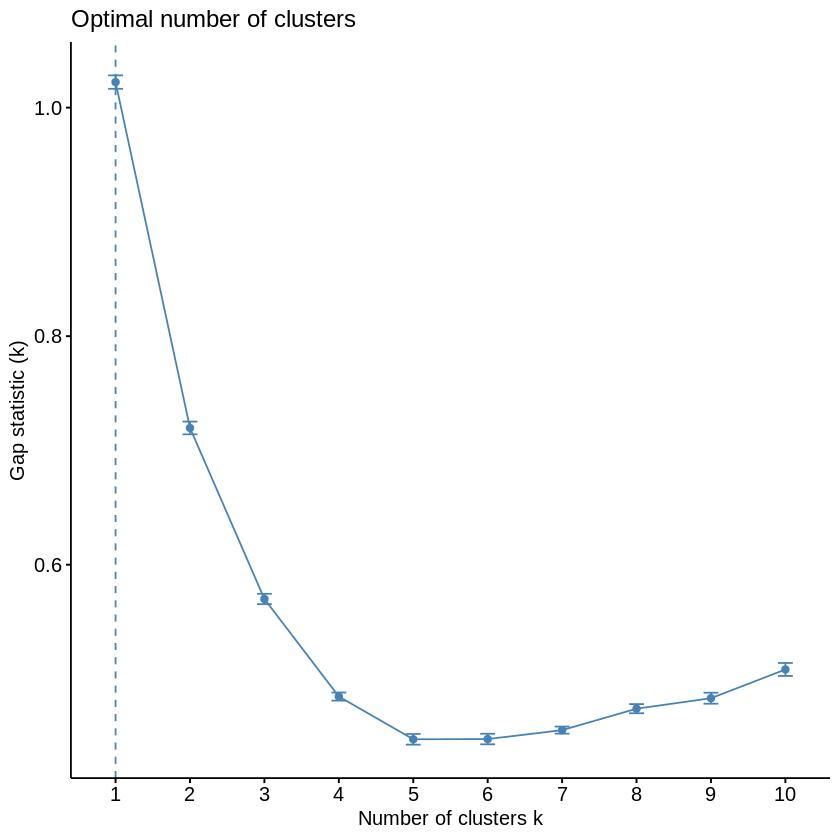

In [67]:
# gap stat method dan plotnya
gap_stat = clusGap(data_n2, FUN = kmeans, nstart = 10,K.max = 10, B = 10)
gap = fviz_gap_stat(gap_stat)
plot(gap)

Dari plot di atas, kita dapatkan bahwa nilai ___k___ yang optimal ada pada saat $k=1$ di mana hal ini tidak sesuai dengan tujuan kita untuk melakukan _clustering_.

---

# Kesimpulan Nilai $k$

Berdasarkan ketiga metode di atas, kita akan pilih $k=3$ untuk algoritma _k-means_.

Berikut adalah hasilnya:

In [68]:
# k-means clustering
final = kmeans(data_n2, 3, nstart = 25)

# center dari masing-masing cluster
final$centers

# save hasil cluster ke data awal
data_kmeans = data_n2
data_kmeans$cluster = final$cluster

# berapa banyak isi dari cluster
table(data_kmeans$cluster)

,typeH,typeL,typeM,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
1,0.09780371,0.6105010,0.2916953,299.9868,310.0027,1636.472,32.92550,108.6884
2,0.10036773,0.5952844,0.3043478,299.9953,309.9973,1428.661,46.31425,108.1157
3,0.09503240,0.5917927,0.3131749,300.2127,310.0728,2034.849,20.20281,108.9741



   1    2    3 
2914 4623  463 

Berikut adalah plot hasil _clustering_ jika digambarkan pada atribut `torque_nm` pada sumbu $x$ dan `rotational_speed_rpm` pada sumbu $y$.

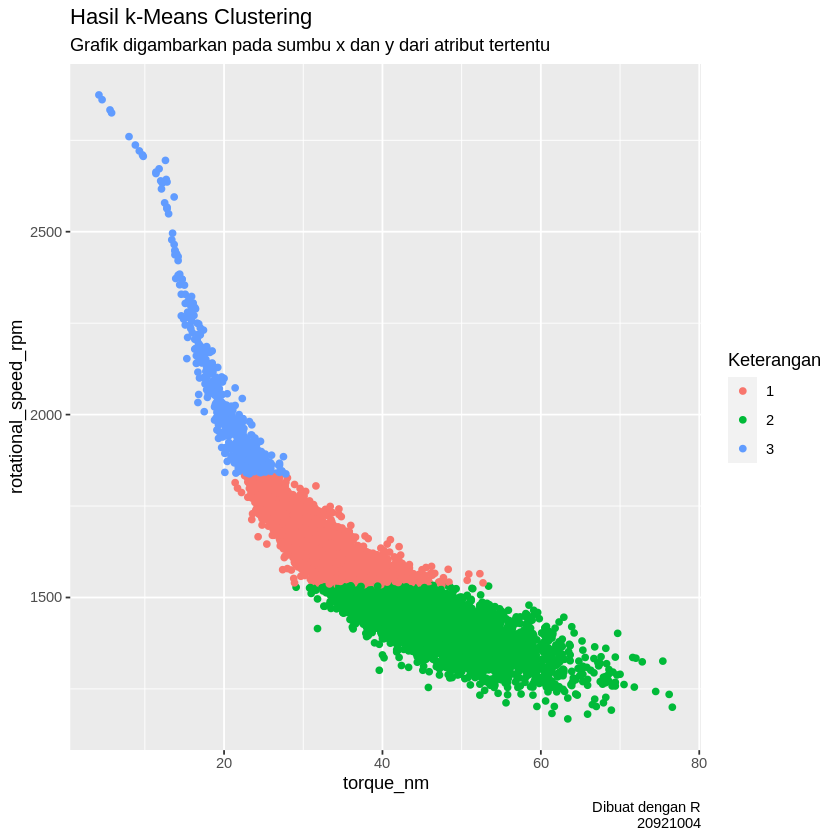

In [69]:
data_kmeans %>%
  ggplot(aes(x = torque_nm,
             y = rotational_speed_rpm,
             color =factor(cluster),
             fill = factor(cluster))) +
  geom_point() +
  scale_fill_manual(values = c("green","red","blue")) +
  labs(title = "Hasil k-Means Clustering",
       subtitle = "Grafik digambarkan pada sumbu x dan y dari atribut tertentu",
       fill = "Keterangan",
       color = "Keterangan",
       caption = "Dibuat dengan R\n20921004")

# _Hierarchical Clustering_

Berikut ini adalah pembuatan _hierarchical clustering_.


Call:
hclust(d = distance_mat, method = "average")

Cluster method   : average 
Distance         : euclidean 
Number of objects: 8000 


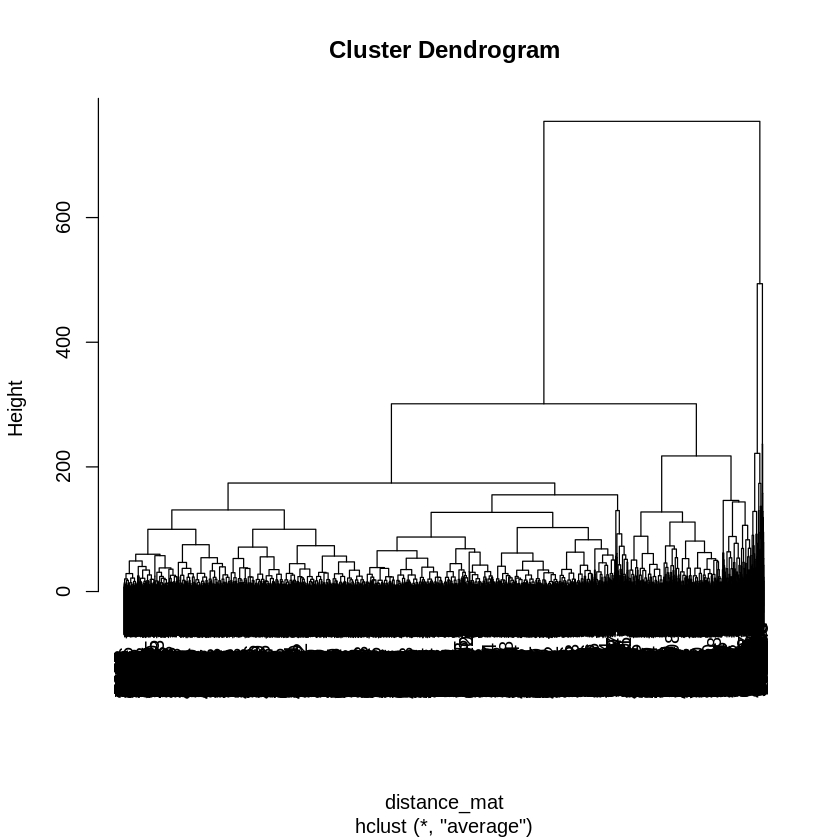

In [70]:
# Finding distance matrix
distance_mat = dist(data_n2, method = 'euclidean')

# Fitting Hierarchical clustering Model
set.seed(240)  # Setting seed
Hierar_cl = hclust(distance_mat, method = "average")
Hierar_cl
 
# Plotting dendrogram
plot(Hierar_cl)

Saya akan pecah dendogram di atas menjadi 4 cluster utama.

fit
   1    2    3    4 
6307 1542  126   25 

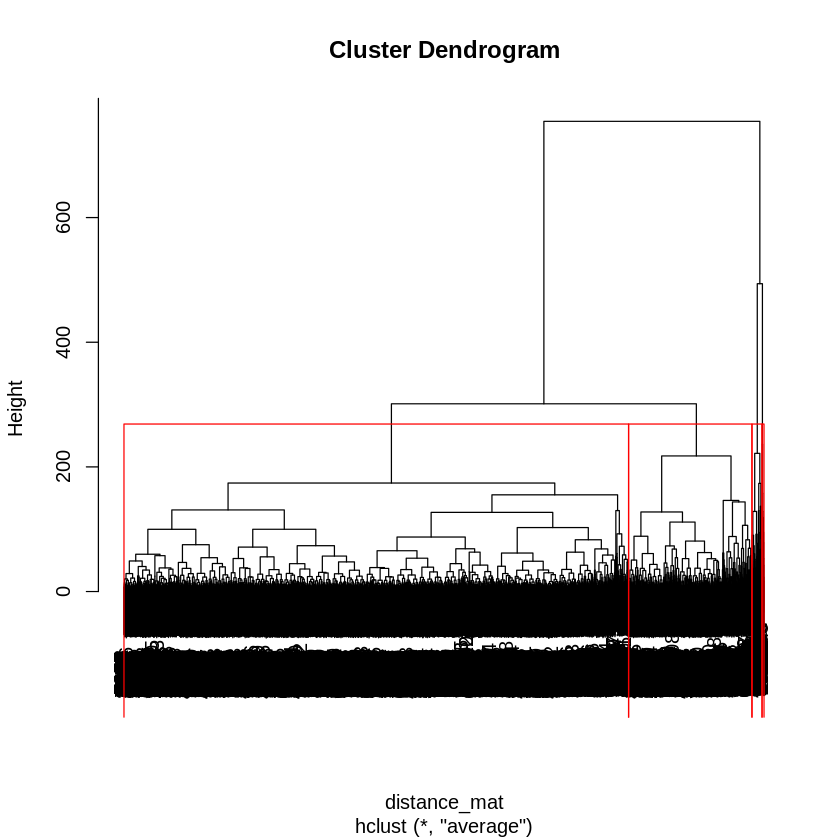

In [71]:
# Pemecahan menjadi 4 cluster
fit = cutree(Hierar_cl, k = 4)
plot(Hierar_cl)
table(fit)
rect.hclust(Hierar_cl, k = 4, border = "red")

Berikut adalah plot hasil _clustering_ dengan sumbu yang sama seperti dengan sebelumnya.

In [73]:
# save hasil cluster ke data awal
data_hc = data_n2
data_hc$cluster = fit

# berapa banyak isi dari cluster
table(data_hc$cluster)




   1    2    3    4 
6307 1542  126   25 

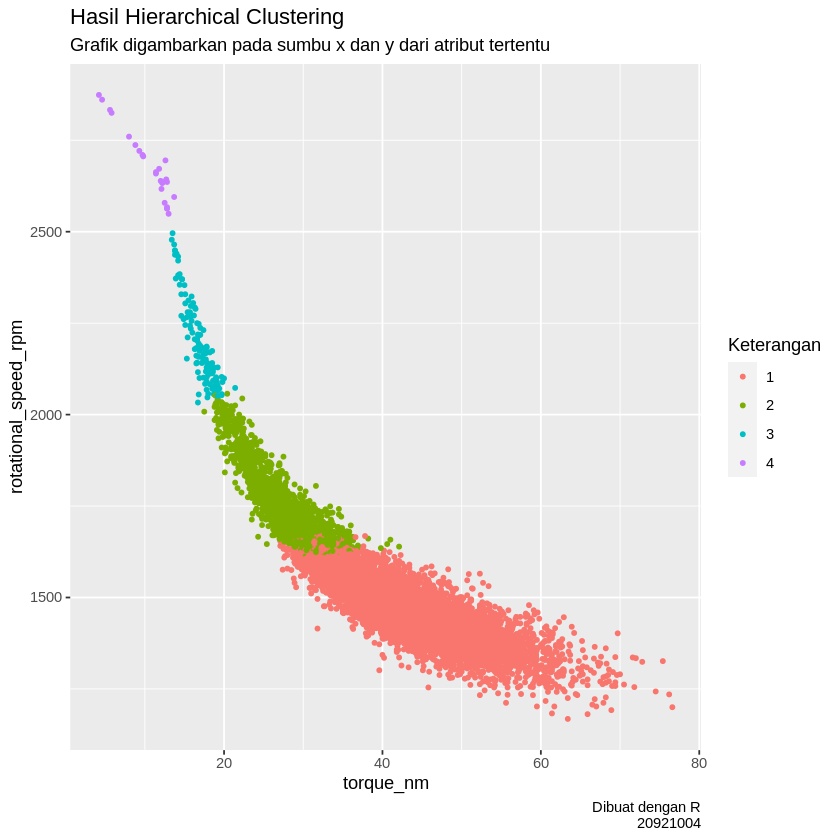

In [77]:
# grafik
data_hc %>% 
  ggplot(aes(x = torque_nm,
             y = rotational_speed_rpm,
             color =factor(cluster),
             fill = factor(cluster))) +
  geom_point(size = 1) +
  scale_fill_manual(values = c("yellow","red","blue","darkgreen")) +
  labs(title = "Hasil Hierarchical Clustering",
       subtitle = "Grafik digambarkan pada sumbu x dan y dari atribut tertentu",
       fill = "Keterangan",
       color = "Keterangan",
       caption = "Dibuat dengan R\n20921004")